In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
train=pd.read_csv("/content/drive/MyDrive/esaa OB 3조/방학프로젝트/data/modeling/train/trainE.csv")
val=pd.read_csv("/content/drive/MyDrive/esaa OB 3조/방학프로젝트/data/modeling/val/valE.csv")
test=pd.read_csv("/content/drive/MyDrive/esaa OB 3조/방학프로젝트/data/modeling/test/testE.csv")

In [57]:
train=train.reset_index(drop=True)

In [58]:
val=val.reset_index(drop=True)

In [59]:
test=test.reset_index(drop=True)

### 평가지표

In [60]:
from sklearn.metrics import mean_squared_log_error
import numpy as np
### RMSLE 계산
def rmsle(y, pred):
    # 오버플로, 언더플로 방지를 위해 log1p()로 로그 변환
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)

    squared_error = (log_y - log_pred) ** 2

    rmsle = np.sqrt(np.mean(squared_error))

    return rmsle

### 모델별 성능을 확인하기 위한 함수

In [61]:
colors = [
    'khaki', 'teal', 'orchid', 'sandybrown', 'greenyellow', 'dodgerblue', 'rosybrown',
    'deeppink', 'salmon', 'olivedrab', 'olive', 'forestgreen',
    'royalblue', 'mediumpurple', 'gold', 'seagreen',
    'turquoise', 'steelblue', 'slategray', 'peru', 'slateblue', 'cadetblue',
    'lime', 'lavender', 'lightcoral', 'lightseagreen', 'lightskyblue', 'lightgreen',
    'lightpink', 'lightsalmon', 'lightsteelblue', 'lightyellow', 'palegreen',
]

In [62]:
## 회귀곡선 시각화
# 예측값, 실제값을 산점도로 표현
import matplotlib.pyplot as plt
import seaborn as sns
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(10, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='b')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

In [63]:
def model_eval(name_, pred, actual):
    global my_predictions
    global colors

    plot_predictions(name_, pred, actual)

    rmsle = np.sqrt(mean_squared_log_error(actual, pred))

    my_predictions[name_] = {'rmsle': rmsle}

    # 데이터프레임 생성
    df = pd.DataFrame(my_predictions).T
    df['model'] = df.index
    df = df.sort_values(by=['rmsle'], ascending=[True])

    # 상한, 하한 설정
    min_ = df['rmsle'].min() - 0.1
    max_ = df['rmsle'].max() + 0.1

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['rmsle'])

    for i, v in enumerate(df['rmsle']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 0.02, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('RMSLE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

    print()
    print(df)

In [64]:
# 모델의 중요도 상위 10개의 피처명과 그때의 중요도 값을 Series로 반환

def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
    ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]
    return ftr_top10

def visualize_ftr_importances(model):
    fig, ax = plt.subplots(figsize=(7, 5))
    fig.tight_layout()

    ftr_top10 = get_top_features(model)
    ax.set_title(model.__class__.__name__ + ' Feature Importances', size=15)

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)

    sns.barplot(x=ftr_top10.values, y=ftr_top10.index, ax=ax, palette = 'Set1')

Type E

In [65]:
train.head()

,sales,onpromotion,type,dcoilwtico,store_nbr_28,store_nbr_29,store_nbr_36,store_nbr_43,family_AUTOMOTIVE,family_BABY CARE,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,8.010692,0.450022,E,-0.797044,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.302585,-0.540343,E,-0.495908,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.295837,-0.540343,E,-0.476580,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.693147,-0.540343,E,1.903392,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.713572,-0.540343,E,-0.140047,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
val.head()

,sales,onpromotion,type,dcoilwtico,store_nbr_28,store_nbr_29,store_nbr_36,store_nbr_43,family_AUTOMOTIVE,family_BABY CARE,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,7.796336,1.699722,E,-0.913943,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.693147,-0.540343,E,1.643957,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4.776751,-0.540343,E,-0.673666,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5.669881,-0.540343,E,1.280050,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.360305,0.084507,E,-0.622227,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
test.head()

,id,onpromotion,type,dcoilwtico,store_nbr_28,store_nbr_29,store_nbr_36,store_nbr_43,family_AUTOMOTIVE,family_BABY CARE,...,month_6,month_7,month_9,quarter_1,quarter_2,quarter_4,year_2013,year_2014,year_2015,year_2016
0,3001548,-0.540343,E,-0.601119,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3001549,-0.540343,E,-0.601119,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3001550,0.450022,E,-0.601119,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3001551,2.949423,E,-0.601119,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3001552,-0.540343,E,-0.601119,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
test.drop('id',axis=1,inplace=True)

In [69]:
## Feature vs Target

X_train = train.drop('sales', axis=1)
y_train = train['sales']

X_val = val.drop('sales', axis=1)
y_val = val['sales']

In [70]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(94833, 71) (94833,)
(40643, 71) (40643,)


In [72]:
X_test = test.drop([ 'family_BOOKS'], axis = 1)

In [74]:
X_test = X_test[X_train.columns] # 피처 순서 재조정

In [75]:
X_test.shape

(2112, 71)

In [76]:
X_train.shape

(94833, 71)

In [77]:
X_val.shape

(40643, 71)

In [78]:
np.expm1(y_train)

0        3012.000
1           9.000
2          26.000
3           1.000
4          40.000
           ...   
94828     281.371
94829     261.111
94830      11.000
94831      56.000
94832       1.000
Name: sales, Length: 94833, dtype: float64

In [84]:
X_test.drop('type',inplace=True,axis=1)
X_train.drop('type',inplace=True,axis=1)

In [86]:
X_val.drop('type',inplace=True,axis=1)

In [91]:
y_train

0        8.010692
1        2.302585
2        3.295837
3        0.693147
4        3.713572
           ...   
94828    5.643222
94829    5.568768
94830    2.484907
94831    4.043051
94832    0.693147
Name: sales, Length: 94833, dtype: float64

In [92]:
y_val

0        7.796336
1        0.693147
2        4.776751
3        5.669881
4        8.360305
           ...   
40638    5.068904
40639    1.609438
40640    0.693147
40641    1.098612
40642    6.047372
Name: sales, Length: 40643, dtype: float64

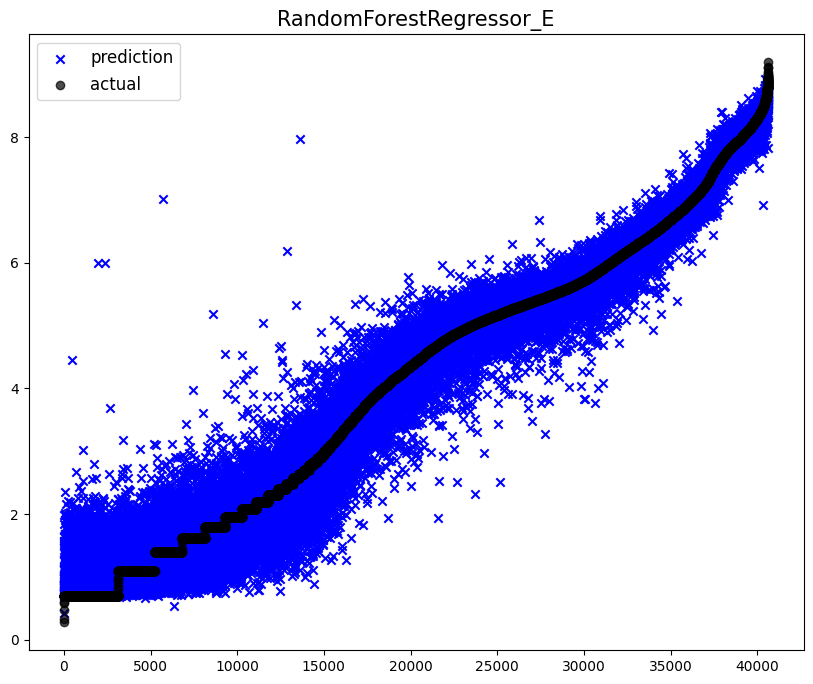

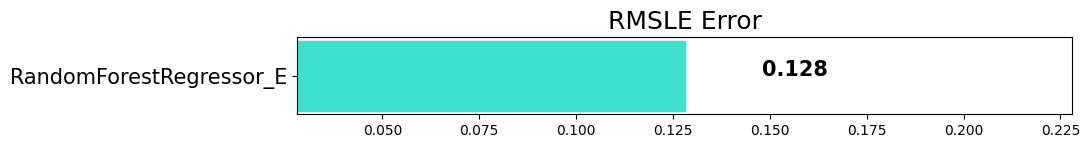


                            rmsle                    model
RandomForestRegressor_E  0.128004  RandomForestRegressor_E


In [96]:
from sklearn.ensemble import RandomForestRegressor

# 기본 모델 생성
rf_baseE = RandomForestRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# 모델 학습
rf_baseE.fit(X_train, y_train)

# 모델 예측
rf_predE = rf_baseE.predict(X_val)

# 로그 스케일로 예측된 예측값을 원복
# original_rf_predE = np.expm1(rf_predE)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor_E', rf_predE, y_val)

In [97]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import STATUS_OK

In [39]:
## 검색 공간 설정
space = {
    'n_estimators': hp.choice('n_estimators', range(50, 201)),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30]),
    'min_samples_split': hp.choice('min_samples_split', range(2, 11)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 11)),
    'max_features': hp.choice('max_features', [None, 'sqrt', 'log2']),
}

In [99]:
## 목적 함수 설정

def objective(params):
  model = RandomForestRegressor(**params)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_val)
  #y_pred = np.expm1(y_pred) # 원래 스케일로 원복

  rmsle_val = rmsle(y_val, y_pred)

  return {'loss': rmsle_val, 'status': STATUS_OK}

In [100]:
## 파라미터 최적화 수행

trials = Trials()
best = fmin(fn = objective, # 목적 함수
            space = space, # 탐색 공간
            algo = tpe.suggest, # 최적화 적용 알고리즘
            max_evals = 30,  # 최대 반복 횟수
            trials = trials, # 최적값 반환
            rstate = np.random.default_rng(seed = 0)) # seed 설정
print(best)

100%|██████████| 30/30 [33:51<00:00, 67.72s/trial, best loss: 0.12369123837042242] 
{'max_depth': 0, 'max_features': 0, 'min_samples_leaf': 8, 'min_samples_split': 0, 'n_estimators': 143}


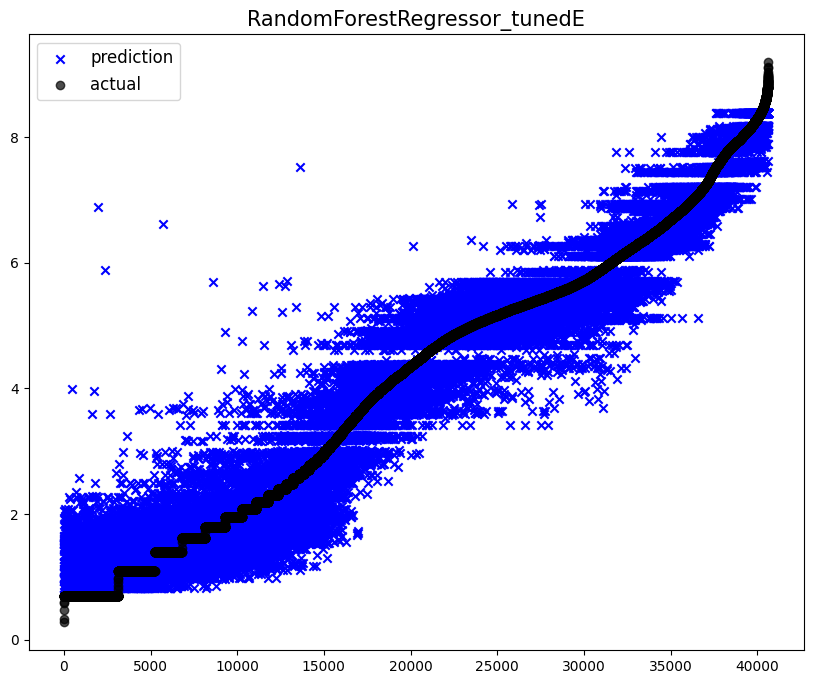

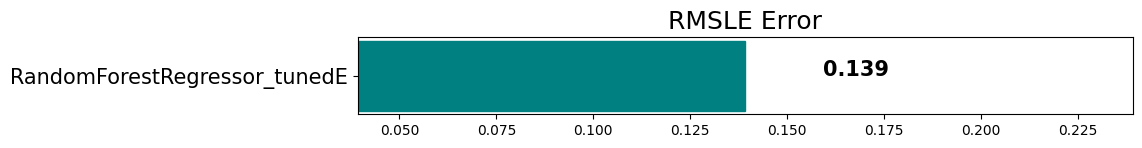


                                 rmsle                         model
RandomForestRegressor_tunedE  0.139192  RandomForestRegressor_tunedE


In [108]:
from sklearn.ensemble import RandomForestRegressor

# 최적 모델 생성
rf_tunedE = RandomForestRegressor(max_depth = None, max_features = None, min_samples_leaf = 8,
                                  min_samples_split = 0.01, n_estimators = 143, n_jobs = -1,random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# 모델 학습
rf_tunedE.fit(X_train, y_train)

# 모델 예측
rf_predE = rf_tunedE.predict(X_val)

# 로그 스케일로 예측된 예측값을 원복
#original_rf_predE = np.expm1(rf_predE)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor_tunedE', rf_predE, y_val)

<ipython-input-64-33f300f93aba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top10.values, y=ftr_top10.index, ax=ax, palette = 'Set1')


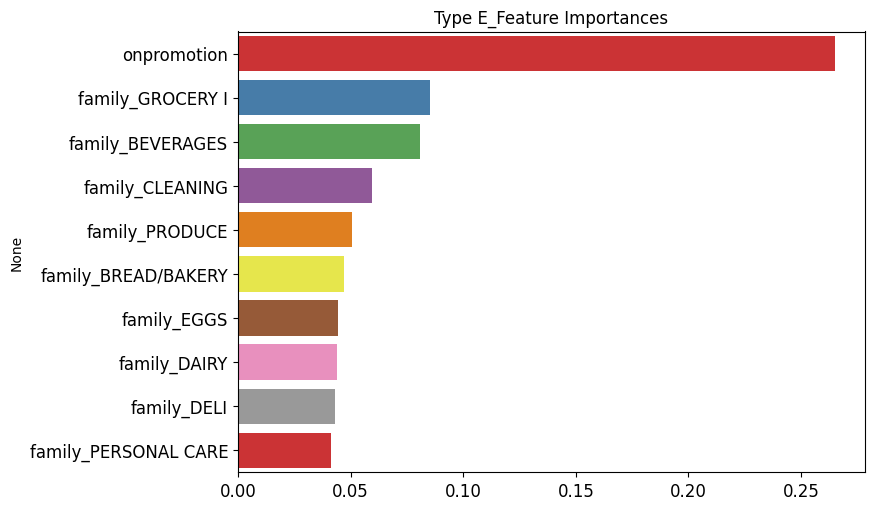

In [109]:
visualize_ftr_importances(rf_tunedE)
plt.title("Type E_Feature Importances")
plt.show()

In [111]:
### 모델 저장

import pickle
import joblib

joblib.dump(rf_tunedE, '/content/drive/MyDrive/esaa OB 3조/방학프로젝트/model/modelE.pkl')

['/content/drive/MyDrive/esaa OB 3조/방학프로젝트/model/modelE.pkl']